In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
#读取数据，处理数据
data = pd.read_csv("D:\桌面\Train.csv")

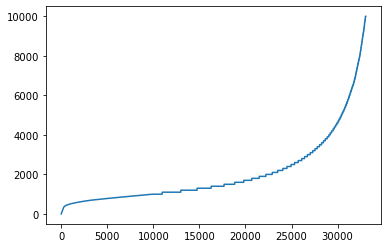

In [34]:
#把shares大于10000的都删除.占比<5%
rows_to_drop = data[data[' shares'] > 10000].index
df = data.drop(rows_to_drop)
y = df.iloc[:, -1]
y_a= y.sort_values()
plt.plot(range(len(y)),y_a)

In [35]:
#手动降维
df = df.drop([" n_non_stop_words"," weekday_is_monday"," weekday_is_tuesday"," weekday_is_wednesday"," weekday_is_thursday"," weekday_is_friday"
                ," weekday_is_saturday"," weekday_is_sunday"], axis=1)

In [17]:
# 将训练数据和测试数据分开
X = df.iloc[:, :-1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df.iloc[:, -1]
# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=15)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)

In [18]:
# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #把y值分为两类来进行预测
    y_binary = np.where(y_train > 1500,1,0)
    lr_model = LogisticRegression(max_iter=200)
    lr_model.fit(X_train, y_binary)
    #把预测值映射回去
    y_pred = lr_model.predict(X_test)
    print(y_pred.mean())
    y_pred= np.where(y_pred > 0, 100*12, 100*9)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    print(np.mean(mape_list))

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

0.29794313369630976
48.38903288203698
0.2813067150635209
48.38475523555398
0.2980332829046899
47.52066728680071
0.29712556732223905
47.572793436145744
0.3059001512859304
48.37094085427762
0.302874432677761
53.03343671302601
0.29652042360060515
52.236844951051225
0.29712556732223905
52.695169732040654
0.30620272314674735
52.118894050138266
0.2826021180030257
51.502883886652604
MAE: 1178.3752
RMSE: 2047.3408
MAPE: 51.5029%


In [28]:
for kkk in range(10,15):
    for jjj in range(1,kkk):
        
# 将训练数据和测试数据分开
X = df.iloc[:, :-1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = df.iloc[:, -1]
# 卡方检验特征选择和PCA特征提取
skb = SelectKBest(chi2, k=kkk)
X_new = skb.fit_transform(X_scaled, y)
pca = PCA(n_components=jjj)
X_pca = pca.fit_transform(X_new)
X_pca = scaler.fit_transform(X_pca)
# 训练模型并进行十折交叉验证
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
mae_list = []
rmse_list = []
mape_list = []
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #把y值分为两类来进行预测
    y_binary = np.where(y_train > 1500,1,0)
    lr_model = LogisticRegression(max_iter=200)
    lr_model.fit(X_train, y_binary)
    #把预测值映射回去
    y_pred = lr_model.predict(X_test)
    print(y_pred.mean())
    y_pred= np.where(y_pred > 0, 100*12, 100*9)
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    print(np.mean(mape_list))

# 显示结果
print('MAE: %.4f' % np.mean(mae_list))
print('RMSE: %.4f' % np.mean(rmse_list))
print('MAPE: %.4f%%' % np.mean(mape_list))

IndentationError: expected an indented block (662912934.py, line 3)

C:\Users\shikangwei\AppData\Local\Temp\ipykernel_17880\1980059509.py:43: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


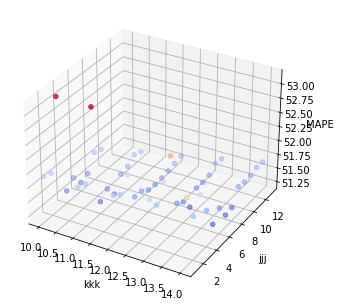

In [29]:
# 存储结果的列表
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
results = []

for kkk in range(10, 20):
    for jjj in range(1, kkk):
        
        # 卡方检验特征选择和PCA特征提取
        skb = SelectKBest(chi2, k=kkk)
        X_new = skb.fit_transform(X_scaled, y)
        pca = PCA(n_components=jjj)
        X_pca = pca.fit_transform(X_new)
        X_pca = scaler.fit_transform(X_pca)
        
        # 训练模型并进行十折交叉验证
        n_splits = 10
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
        mape_list = []
        for train_index, test_index in kf.split(X_pca):
            X_train, X_test = X_pca[train_index], X_pca[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            # 把y值分为两类来进行预测
            y_binary = np.where(y_train > 1500, 1, 0)
            lr_model = LogisticRegression(max_iter=200)
            lr_model.fit(X_train, y_binary)
            # 把预测值映射回去
            y_pred = lr_model.predict(X_test)
            y_pred = np.where(y_pred > 0, 100 * 12, 100 * 9)
            mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

        # 存储kkk和jjj遍历的结果以及对应的np.mean(mape_list)值
        results.append((kkk, jjj, np.mean(mape_list)))

# 将结果转化为数组形式，并提取出kkk、jjj和np.mean(mape_list)的值
results_array = np.array(results)
kkk_values = results_array[:, 0]
jjj_values = results_array[:, 1]
mape_values = results_array[:, 2]

# 用mplot3d子库进行三维图展示
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(kkk_values, jjj_values, mape_values, c=mape_values, cmap='coolwarm')
ax.set_xlabel('kkk')
ax.set_ylabel('jjj')
ax.set_zlabel('MAPE')
plt.show()

In [31]:
mape_values.min()

51.2558277894867

In [ ]:
import plotly.graph_objects as go
from scipy.interpolate import griddata

# 存储结果的列表
results = []

for kkk in range(10, 20):
    for jjj in range(1, kkk):
        
        # 卡方检验特征选择和PCA特征提取
        skb = SelectKBest(chi2, k=kkk)
        X_new = skb.fit_transform(X_scaled, y)
        pca = PCA(n_components=jjj)
        X_pca = pca.fit_transform(X_new)
        X_pca = scaler.fit_transform(X_pca)
        
        # 训练模型并进行十折交叉验证
        n_splits = 10
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
        mape_list = []
        for train_index, test_index in kf.split(X_pca):
            X_train, X_test = X_pca[train_index], X_pca[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            # 把y值分为两类来进行预测
            y_binary = np.where(y_train > 1500, 1, 0)
            lr_model = LogisticRegression(max_iter=200)
            lr_model.fit(X_train, y_binary)
            # 把预测值映射回去
            y_pred = lr_model.predict(X_test)
            y_pred = np.where(y_pred > 0, 100 * 12, 100 * 9)
            mape_list.append(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

        # 存储kkk和jjj遍历的结果以及对应的np.mean(mape_list)值
        results.append((kkk, jjj, np.mean(mape_list)))

# 将结果转化为数组形式，并提取出kkk、jjj和np.mean(mape_list)的值
results_array = np.array(results)
kkk_values = results_array[:, 0]
jjj_values = results_array[:, 1]
mape_values = results_array[:, 2]

# 创建3D散点图
fig = go.Figure(data=[go.Scatter3d(x=kkk_values, y=jjj_values, z=mape_values, mode='markers', 
                                   marker=dict(size=5, color=mape_values, colorscale='Viridis'))])

# 生成插值面
x_grid, y_grid = np.mgrid[min(kkk_values):max(kkk_values):100j, min(jjj_values):max(jjj_values):100j]
z_grid = griddata((kkk_values, jjj_values), mape_values, (x_grid, y_grid), method='cubic')
fig.add_surface(x=x_grid[:,0], y=y_grid[0,:], z=z_grid, opacity=0.6)

# 设置坐标轴名称和范围
fig.update_layout(scene=dict(xaxis_title='kkk', yaxis_title='jjj', zaxis_title='MAPE', 
                             xaxis=dict(range=[min(kkk_values), max(kkk_values)]),
                             yaxis=dict(range=[min(jjj_values), max(jjj_values)]),
                             zaxis=dict(range=[min(mape_values), max(mape_values)])))

In [41]:
# 找到最小MAPE值对应的索引
min_index = np.argmin(mape_values)

# 根据索引获取kkk和jjj的值
min_kkk = kkk_values[min_index]
min_jjj = jjj_values[min_index]

print('最小MAPE值对应的kkk为：', min_kkk)
print('最小MAPE值对应的jjj为：', min_jjj)

最小MAPE值对应的kkk为： 18.0
最小MAPE值对应的jjj为： 17.0
